<a href="https://colab.research.google.com/github/anderson-perez/IAC-2025-2/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import make_blobs

In [37]:
X, y = make_blobs(centers = 4)

In [3]:
X.shape, y.shape

((100, 2), (100,))

In [6]:
import matplotlib.pyplot as plt

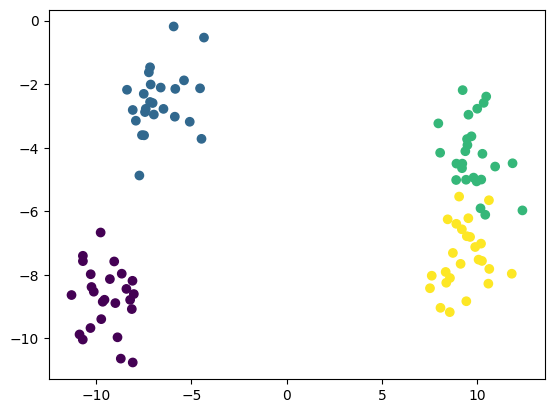

In [38]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [8]:
from sklearn.svm import SVC

In [14]:
classificador = SVC(kernel='linear')

In [15]:
classificador.fit(X, y)

SVC(kernel='linear')

In [16]:
v = classificador.support_vectors_

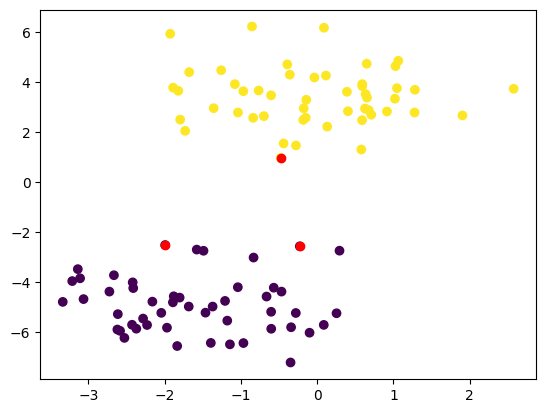

In [17]:
plt.ion()
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(v[:,0], v[:, 1], c = 'red')
plt.draw()

In [39]:
import pandas as pd

In [40]:
dados = pd.read_csv('/content/diabetes.csv')

In [41]:
dados.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [42]:
X = dados.iloc[:, 0:8].values
y = dados.iloc[:, 8].values

In [43]:
X.shape, y.shape

((768, 8), (768,))

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [60]:
lr = LogisticRegression()
svm = SVC(kernel='sigmoid')

In [48]:
# Separar dados em treino e teste
from sklearn.model_selection import train_test_split

In [49]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, random_state=42)

In [63]:
# Regressão Logística
lr.fit(X_treino, y_treino)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [64]:
# Máquina de Vetores de Suporte
svm.fit(X_treino, y_treino)

SVC(kernel='sigmoid')

In [65]:
predicoes_lr = lr.predict(X_teste)
predicoes_svm = svm.predict(X_teste)

In [53]:
# Gerando matriz de confusão
from yellowbrick.classifier import ConfusionMatrix

/usr/local/lib/python3.12/dist-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


0.7291666666666666

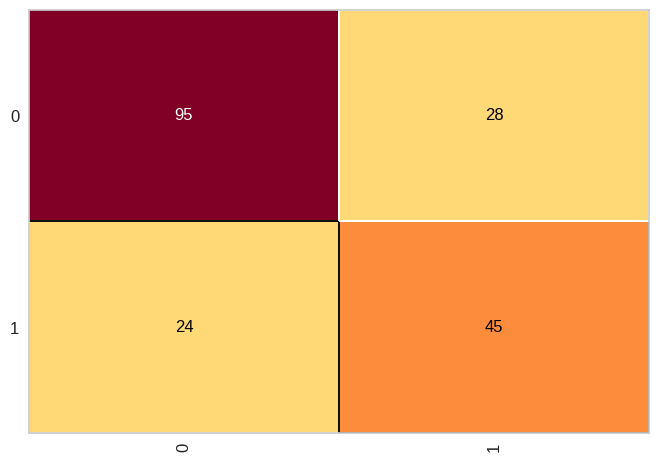

In [66]:
cm_lr = ConfusionMatrix(lr)
cm_lr.score(X_teste, y_teste)

/usr/local/lib/python3.12/dist-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


0.5520833333333334

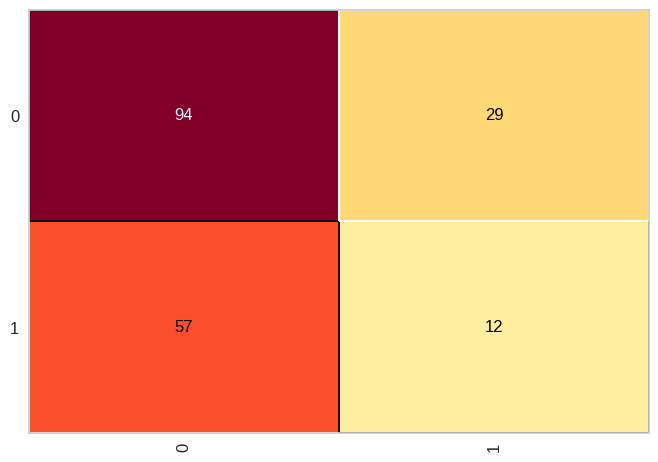

In [67]:
cm_svm = ConfusionMatrix(svm)
cm_svm.score(X_teste, y_teste)

In [57]:
# Gerando dados estatísticos (desempenho dos modelos)
from sklearn.metrics import classification_report

In [68]:
print(classification_report(y_teste, predicoes_lr))

              precision    recall  f1-score   support

           0       0.80      0.77      0.79       123
           1       0.62      0.65      0.63        69

    accuracy                           0.73       192
   macro avg       0.71      0.71      0.71       192
weighted avg       0.73      0.73      0.73       192



In [69]:
print(classification_report(y_teste, predicoes_svm))

              precision    recall  f1-score   support

           0       0.62      0.76      0.69       123
           1       0.29      0.17      0.22        69

    accuracy                           0.55       192
   macro avg       0.46      0.47      0.45       192
weighted avg       0.50      0.55      0.52       192

